<a href="https://colab.research.google.com/github/bojiix/RAM-OSI-BAN-AI/blob/bojan/ErrorFilterAndOthers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
import os
import random

In [ ]:
ls

cardio_train.csv  sample_data/


Read CSV, print details about DF

In [ ]:
df = pd.read_csv("cardio_train.csv", sep=";") # citirea bazei de date; separarea in functie de ;

In [ ]:
df # preview dataframe

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
df.info() # informatiile dataframe-ului, tip coloane, coloane non-null, nume coloane 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
df.describe() # calculeaza count, mean, ... max pentru toate datele

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Figures

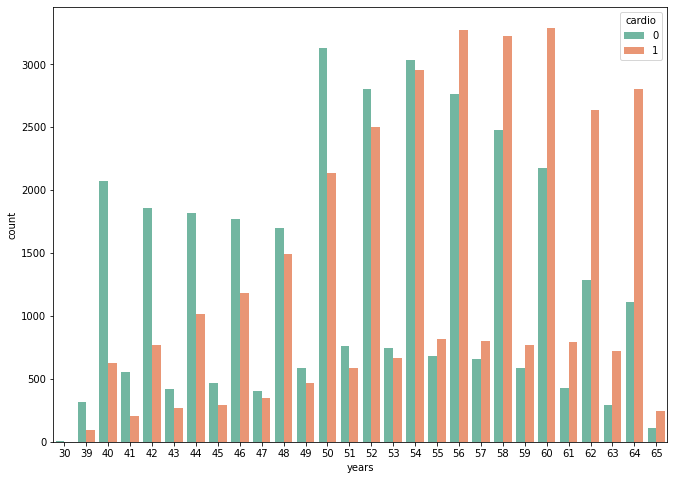

In [ ]:
rcParams['figure.figsize'] = 11, 8 # setarea dimensiunii figurii
df['years'] = (df['age'] / 365).round().astype('int') # adaugaarea unei coloane noi pentru calcularea varstei in ani
sns.countplot(x='years', hue='cardio', data = df, palette="Set2"); # generarea figurii; x = varsta, hue = criteriul pe baza caruia se face count

In [ ]:
df_categorical = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']] # filtrare pe baza coloanelor
df_categorical

,cholesterol,gluc,smoke,alco,active
0,1,1,0,0,1
1,3,1,0,0,1
2,3,1,0,0,0
3,1,1,0,0,1
4,1,1,0,0,0
...,...,...,...,...,...
69995,1,1,1,0,1
69996,2,2,0,0,1
69997,3,1,0,1,0
69998,1,2,0,0,0


In [ ]:
meltedData= pd.melt(df_categorical) # transformarea coloanelor in valori pe linii
meltedData

,variable,value
0,cholesterol,1
1,cholesterol,3
2,cholesterol,3
3,cholesterol,1
4,cholesterol,1
...,...,...
349995,active,1
349996,active,1
349997,active,0
349998,active,0


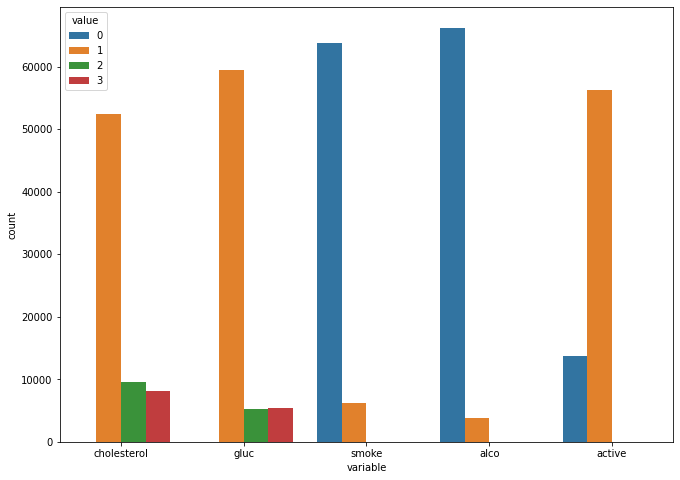

In [ ]:
sns.countplot(x="variable", hue="value",data= meltedData); # afisarea noii figuri pe variabile

In [ ]:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active']) # cream un df cu 3 coloane, cu valorile coloanelor originale
df_long

,cardio,variable,value
0,0,cholesterol,1
1,1,cholesterol,3
2,1,cholesterol,3
3,1,cholesterol,1
4,0,cholesterol,1
...,...,...,...
349995,0,active,1
349996,1,active,1
349997,1,active,0
349998,1,active,0


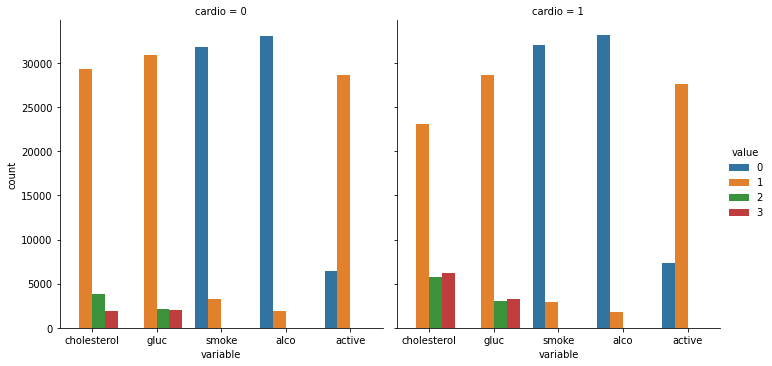

In [ ]:
sns.catplot(x="variable", hue="value", col="cardio", data=df_long, kind="count"); # cream un category plot, similar count plotului, dar cu un param in plus col

Comparison

In [ ]:
df.groupby('gender')['height'].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

In [ ]:
df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [ ]:
df.groupby('gender')['alco'].sum()

gender
1    1161
2    2603
Name: alco, dtype: int64

In [ ]:
df['cardio'].value_counts(normalize=True)

0    0.5003
1    0.4997
Name: cardio, dtype: float64

In [ ]:
pd.crosstab(df['cardio'],df['gender'],normalize=True)

gender,1,2
cardio,,
0,0.327343,0.172957
1,0.323086,0.176614


Check for errors - test

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


In [ ]:
olddf = df.copy()
olddf

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,53
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,62
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61


In [ ]:
df = olddf.copy()

In [ ]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)

In [ ]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 1082 cases


In [ ]:
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025)) | (df['ap_lo'] < 0)].index,inplace=True)
df.drop(df[(df['ap_hi'] < 0) | (df['ap_lo'] > df['ap_hi'])].index,inplace=True)

In [ ]:
df['id'].count()

60142

In [ ]:
blood_pressure = df.loc[:,['ap_lo','ap_hi']]
blood_pressure

,ap_lo,ap_hi
0,80,110
1,90,140
2,70,130
3,100,150
4,60,100
...,...,...
69993,90,130
69994,80,150
69995,80,120
69998,80,135


In [ ]:
blood_pressureMelt = blood_pressure.melt()
blood_pressureMelt

,variable,value
0,ap_lo,80
1,ap_lo,90
2,ap_lo,70
3,ap_lo,100
4,ap_lo,60
...,...,...
120279,ap_hi,130
120280,ap_hi,150
120281,ap_hi,120
120282,ap_hi,135


Diastilic pressure is higher than systolic one in 0 cases


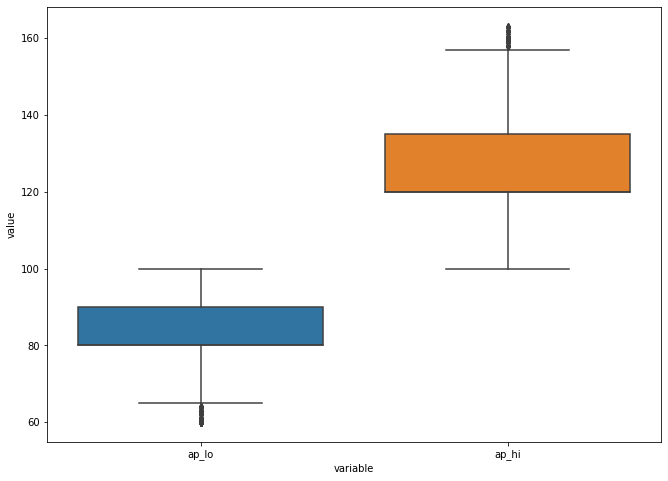

In [ ]:
sns.boxplot(x = 'variable',y = 'value',data = blood_pressureMelt)
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

## Fake Data And Error Filtering Task

**Imports And Read Data**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
import os
import random

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/bojiix/RAM-OSI-BAN-AI/bojan/cardio_train.csv", sep=";") # citirea bazei de date; separarea in functie de ;

**First - Analyze Data**

https://www.kaggle.com/sulianova/eda-cardiovascular-data

The source offers a dataset of 70k entries and described all of the data as being of 3 types:
  - objective: factual information;
  - examination: results of medical examination;
  - subjective: information given by the patient.

Firstly, we'll take a look at every data's type and limits. We have:

Age(Objective) - measured in days(int)

Height(Objective) - measured in cm(int)

Weight(Objective) - measured in kg(float)

Gender(Objective) - categorical(1 - female, 2 - male)

---

Systolic blood pressure(Examination) - measured in mmHg(int)

Diastolic blood pressure(Examination) -	measured in mmHg(int)

Cholesterol(Examination) - has 3 numerical represented stages:	1 - normal, 2 - above normal, 3 - well above normal

Glucose(Examination) - has also 3 numerical represented stages: 1 - normal, 2 - above normal, 3 - well above normal

---

Smoking(Subjective)	- binary: 0 - no, 1 - yes

Alcohol intake(Subjective) - binary: 0 - no, 1 - yes

Physical activity(Subjective) - binary: 0 - no, 1 - yes

---

Presence or absence of cardiovascular disease(the target aspect) - binary: 0 - ok, 1 - not ok

---

All of this data will be arranged as columns:

Age - age

Height - height

Weight - weight

Gender - gender

Systolic blood pressure - sbp

Diastolic blood pressure - dbp

Cholesterol - cholesterol

Glucose - glucose

Smoking - smoking

Alcohol intake - alcohol

Physical activity - physical_active

Presence or absence of cardiovascular disease - cardio_issues

We also added another column called 'years' that also represents the age of the subject.

In [ ]:
df['years'] = (df['age'] / 365).round().astype('int') # added age in years
df #preview data

,id,age,gender,height,weight,sbp,dbp,cholesterol,glucose,smoking,alcohol,physical_active,cardio_issues,years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,53
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,62
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61


In [ ]:
df.info() # informatiile dataframe-ului, tip coloane, coloane non-null, nume coloane 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               70000 non-null  int64  
 1   age              70000 non-null  int64  
 2   gender           70000 non-null  int64  
 3   height           70000 non-null  int64  
 4   weight           70000 non-null  float64
 5   sbp              70000 non-null  int64  
 6   dbp              70000 non-null  int64  
 7   cholesterol      70000 non-null  int64  
 8   glucose          70000 non-null  int64  
 9   smoking          70000 non-null  int64  
 10  alcohol          70000 non-null  int64  
 11  physical_active  70000 non-null  int64  
 12  cardio_issues    70000 non-null  int64  
 13  years            70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [ ]:
df.describe() # calculeaza count, mean, ... max pentru toate datele

,id,age,gender,height,weight,sbp,dbp,cholesterol,glucose,smoking,alcohol,physical_active,cardio_issues,years
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


In [ ]:
limits = {
  "age": [0, 54750],
  "gender": [1, 2],
  "height": [30, 250],
  "weight": [1, 200],
  "sbp": [0, 250],
  "dbp": [0, 250],
  "cholesterol": [1, 3],
  "glucose": [1, 3],
  "smoking": [0, 1],
  "alcohol": [0, 1],
  "physical_active": [0, 1],
  "cardio_issues": [0, 1],
  "years": [0, 110]
}

In [ ]:
def checkIfIsOutOfLimits(data):
  for key, value in limits.items():
    print("Instances where {0} is greater or lesser than the chosen limits: Greater: {1}, Lesser {2}".format(key, data[data[key] > value[1]].shape[0], data[data[key] < value[0]].shape[0]))

In [ ]:
def checkDSP(data, bpmelt):
  sns.boxplot(x = 'variable',y = 'value',data = bpmelt)
  print("Diastilic pressure is higher than systolic one in {0} cases".format(data[data['dbp']> data['sbp']].shape[0]))

In [ ]:
checkIfIsOutOfLimits(df)

Instances where age is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances where gender is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances where height is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances where weight is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances where sbp is greater or lesser than the chosen limits: Greater: 40, Lesser 7
Instances where dbp is greater or lesser than the chosen limits: Greater: 953, Lesser 1
Instances where cholesterol is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances where glucose is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances where smoking is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances where alcohol is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances where physical_active is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances 

In [ ]:
blood_pressure = df.loc[:,['dbp','sbp']]
blood_pressure

,dbp,sbp
0,80,110
1,90,140
2,70,130
3,100,150
4,60,100
...,...,...
69995,80,120
69996,90,140
69997,90,180
69998,80,135


In [ ]:
blood_pressureMelt = blood_pressure.melt()
blood_pressureMelt

,variable,value
0,dbp,80
1,dbp,90
2,dbp,70
3,dbp,100
4,dbp,60
...,...,...
139995,sbp,120
139996,sbp,140
139997,sbp,180
139998,sbp,135


Diastilic pressure is higher than systolic one in 1234 cases


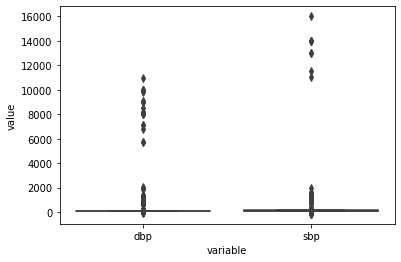

In [ ]:
checkDSP(df, blood_pressureMelt)

In [ ]:
cleandf = df.copy()
cleandf

,id,age,gender,height,weight,sbp,dbp,cholesterol,glucose,smoking,alcohol,physical_active,cardio_issues,years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,53
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,62
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61


Optional - Create Fake Data

In [ ]:
def generateArray(cond, num, lims, d_var):
  arr = []

  if isinstance(d_var, np.int64) or isinstance(d_var, int):
    if cond == True:
      arr = np.random.randint(lims[0], lims[1] + 1, size=num)
    else:
      arr = np.random.randint(lims[1] + 2, 100000, size=num)
  else:
    if isinstance(d_var, np.float64) or isinstance(d_var, float):
      if cond == True:
        arr = np.random.uniform(lims[0], lims[1] + 1, size=num)
      else:
        arr = np.random.uniform(lims[1] + 2, 100000, size=num)

        for i in range(len(arr)):
          arr[i] = float('NaN') if random.choice([True, False]) == True else arr[i]

  return arr

In [ ]:
def createData(assign_vec, num, aux):
  obj = {
      "id": aux.tail(1)['id'] + 1,
      "age": generateArray(assign_vec[1], num, limits["age"], aux['age'][0]),
      "gender": generateArray(assign_vec[2], num, limits["gender"], aux['gender'][0]),
      "height": generateArray(assign_vec[3], num, limits["height"], aux['height'][0]),
      "weight": generateArray(assign_vec[4], num, limits["weight"], aux['weight'][0]),
      "sbp": generateArray(assign_vec[5], num, limits["sbp"], aux['sbp'][0]),
      "dbp": generateArray(assign_vec[6], num, limits["dbp"], aux['dbp'][0]),
      "cholesterol": generateArray(assign_vec[7], num, limits["cholesterol"], aux['cholesterol'][0]),
      "glucose": generateArray(assign_vec[8], num, limits["glucose"], aux['glucose'][0]),
      "smoking": generateArray(assign_vec[9], num, limits["smoking"], aux['smoking'][0]),
      "alcohol": generateArray(assign_vec[10], num, limits["alcohol"], aux['alcohol'][0]),
      "physical_active": generateArray(assign_vec[11], num, limits["physical_active"], aux['physical_active'][0]),
      "cardio_issues": generateArray(assign_vec[12], num, limits["cardio_issues"], aux['cardio_issues'][0]),
      "years": generateArray(assign_vec[13], num, limits["years"], aux['years'][0]),
  }
  to_adddf = pd.DataFrame(obj)
  return to_adddf

In [ ]:
def generateData(aux, n):
  for i in range(n):
    arr = np.random.choice([True, False], size=len(aux.columns))
    aux = aux.append(createData(arr, 1, aux), ignore_index=True)  
  return aux

In [ ]:
cleandf_fd = cleandf.head(10).copy()
cleandf_fd

,id,age,gender,height,weight,sbp,dbp,cholesterol,glucose,smoking,alcohol,physical_active,cardio_issues,years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,60
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,61
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,62
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0,48
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0,54


In [ ]:
cleandf_fd = generateData(cleandf_fd, 3)
cleandf_fd

,id,age,gender,height,weight,sbp,dbp,cholesterol,glucose,smoking,alcohol,physical_active,cardio_issues,years
0,0,18393,2,168,62.000000,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.000000,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.000000,130,70,3,1,0,0,0,1,52
3,3,17623,2,169,82.000000,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.000000,100,60,1,1,0,0,0,0,48
5,8,21914,1,151,67.000000,120,80,2,2,0,0,0,0,60
6,9,22113,1,157,93.000000,130,80,3,1,0,0,1,0,61
7,12,22584,2,178,95.000000,130,90,3,3,0,0,1,1,62
8,13,17668,1,158,71.000000,110,70,1,1,0,0,1,0,48
9,14,19834,1,164,68.000000,110,60,1,1,0,0,0,0,54


**Second - Clean Data**

In [ ]:
def clearErrorsFromMyData(data):
  for key, value in limits.items():
    data.drop(data[(data[key] > value[1]) | (data[key] < value[0])].index,inplace=True)
  data.drop(data[(data['sbp'] < 0) | (data['dbp'] < 0) | (data['sbp'] < data['dbp'])].index,inplace=True)
  return data

In [ ]:
data = cleandf.copy()
print("Before\n {0}".format(data))
data = clearErrorsFromMyData(data)
print("After\n {0}".format(data))

Before
           id    age  gender  ...  physical_active  cardio_issues  years
0          0  18393       2  ...                1              0     50
1          1  20228       1  ...                1              1     55
2          2  18857       1  ...                0              1     52
3          3  17623       2  ...                1              1     48
4          4  17474       1  ...                0              0     48
...      ...    ...     ...  ...              ...            ...    ...
69995  99993  19240       2  ...                1              0     53
69996  99995  22601       1  ...                1              1     62
69997  99996  19066       2  ...                0              1     52
69998  99998  22431       1  ...                0              1     61
69999  99999  20540       1  ...                1              0     56

[70000 rows x 14 columns]
After
           id    age  gender  ...  physical_active  cardio_issues  years
0          0  18393   

In [ ]:
checkIfIsOutOfLimits(data)

Instances where age is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances where gender is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances where height is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances where weight is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances where sbp is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances where dbp is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances where cholesterol is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances where glucose is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances where smoking is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances where alcohol is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances where physical_active is greater or lesser than the chosen limits: Greater: 0, Lesser 0
Instances whe

Diastilic pressure is higher than systolic one in 1234 cases


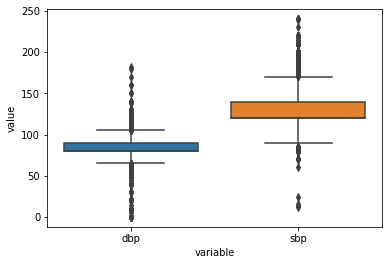

In [ ]:
blood_pressure = data.loc[:,['dbp','sbp']]
blood_pressureMelt = blood_pressure.melt()

checkDSP(df, blood_pressureMelt)

In [ ]:
data.describe()

,id,age,gender,height,weight,sbp,dbp,cholesterol,glucose,smoking,alcohol,physical_active,cardio_issues,years
count,68725.000000,68725.000000,68725.000000,68725.000000,68725.000000,68725.000000,68725.000000,68725.000000,68725.000000,68725.000000,68725.000000,68725.000000,68725.000000,68725.000000
mean,49974.239040,19464.272783,1.348650,164.359753,74.117534,126.666686,81.256559,1.364642,1.225609,0.087930,0.053343,0.803390,0.494682,53.326359
std,28843.627336,2468.261898,0.476547,8.191169,14.332779,16.718911,9.641727,0.678909,0.571460,0.283195,0.224718,0.397438,0.499975,6.768071
min,0.000000,10798.000000,1.000000,55.000000,11.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,25003.000000,17657.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50012.000000,19701.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,74867.000000,21324.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,240.000000,182.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000
